### Generate plots

Before running this notebook you have to generate the input dataframe, **df_all.tsv**, with the main.py script.
Optionally, a mapping file specifying group and label of methods can be used to select only one method (the best) for each group and each namespace.

#### Output
* 3 figures, *fig_<metric>_<namespace>.png*
* 1 TSV, *eval_<metric>.tsv*

In [75]:
# Input
df_file = "../../CAFA-evaluator_data/CAFA3/results/df_all.tsv"
out_folder = "../../CAFA-evaluator_data/CAFA3/results"

# Set to None if you don't want to use it. Results will not be grouped
names_file = None
# names_file = "../../CAFA-evaluator_data/CAFA3/names.tsv"

# Select a metric
metric, cols = ('f', ['rc', 'pr'])
# metric, cols =  ('wf', ['wrc', 'wpr'])
# metric, cols = ('s', ['ru', 'mi'])

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.set_loglevel("info")

In [77]:
df = pd.read_csv(df_file, sep="\t")
df

,filename,ns,tau,cov,pr,rc,f,wpr,wrc,wf,mi,ru,s
0,ZhuLab1_GOLabeler-2015.cafa,biological_process,0.01,1.000000,0.020865,0.844478,0.040723,0.014994,0.745858,0.029397,5428.198473,33.907521,5428.304374
1,ZhuLab1_GOLabeler-2015.cafa,biological_process,0.02,1.000000,0.020865,0.844478,0.040723,0.014994,0.745858,0.029397,5428.198473,33.907521,5428.304374
2,ZhuLab1_GOLabeler-2015.cafa,biological_process,0.03,1.000000,0.020865,0.844478,0.040723,0.014994,0.745858,0.029397,5428.198473,33.907521,5428.304374
3,ZhuLab1_GOLabeler-2015.cafa,biological_process,0.04,1.000000,0.020866,0.844478,0.040726,0.014996,0.745858,0.029400,5427.630821,33.907521,5427.736734
4,ZhuLab1_GOLabeler-2015.cafa,biological_process,0.05,1.000000,0.020877,0.844478,0.040747,0.015006,0.745858,0.029419,5424.371807,33.907521,5424.477783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,sysbiogroup.cafa,molecular_function,0.95,0.709534,0.418023,0.073154,0.124518,0.425644,0.097213,0.158277,11.905188,58.458560,59.658501
11990,sysbiogroup.cafa,molecular_function,0.96,0.709534,0.418023,0.073154,0.124518,0.425644,0.097213,0.158277,11.905188,58.458560,59.658501
11991,sysbiogroup.cafa,molecular_function,0.97,0.709534,0.418023,0.073154,0.124518,0.425644,0.097213,0.158277,11.905188,58.458560,59.658501
11992,sysbiogroup.cafa,molecular_function,0.98,0.709534,0.418023,0.073154,0.124518,0.425644,0.097213,0.158277,11.905188,58.458560,59.658501


In [78]:
if names_file is None:
    df['group'] = df['filename']
    df['label'] = df['filename']
    df['is_baseline'] = False
else:
    # Set method information (optional)
    methods = pd.read_csv(names_file, delim_whitespace=True)
    df = pd.merge(df, methods, on='filename', how='left')
    df['group'].fillna(df['filename'], inplace=True)
    df['label'].fillna(df['filename'], inplace=True)
    if 'is_baseline' not in df:
        df['is_baseline'] = False
    else:
        df['is_baseline'].fillna(False, inplace=True)
df = df.drop(columns='filename').set_index(['group', 'label', 'ns', 'tau'])
df

cov  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  1.000000   
                                                                           0.02  1.000000   
                                                                           0.03  1.000000   
                                                                           0.04  1.000000   
                                                                           0.05  1.000000   
...                                                                                   ...   
sysbiogroup.cafa            sysbiogroup.cafa            molecular_function 0.95  0.709534   
                                                                           0.96  0.709534   
                                                                           0.97  0.709534   
                                                                           0.98  0.709534   
                                                                           0.99  0.709534   

                                                                                       pr  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  0.020865   
                                                                           0.02  0.020865   
                                                                           0.03  0.020865   
                                                                           0.04  0.020866   
                                                                           0.05  0.020877   
...                                                                                   ...   
sysbiogroup.cafa            sysbiogroup.cafa            molecular_function 0.95  0.418023   
                                                                           0.96  0.418023   
                                                                           0.97  0.418023   
                                                                           0.98  0.418023   
                                                                           0.99  0.418023   

                                                                                       rc  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  0.844478   
                                                                           0.02  0.844478   
                                                                           0.03  0.844478   
                                                                           0.04  0.844478   
                                                                           0.05  0.844478   
...                                                                                   ...   
sysbiogroup.cafa            sysbiogroup.cafa            molecular_function 0.95  0.073154   
                                                                           0.96  0.073154   
                                                                           0.97  0.073154   
                                                                           0.98  0.073154   
                                                                           0.99  0.073154   

                                                                                        f  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  0.040723   
                                                                           0.02  0.040723   
                                                                           0.03  0.0

In [79]:
# Assign colors based on group
cmap = plt.get_cmap('tab20')
df['colors'] = df.index.get_level_values('group')
df['colors'] = pd.factorize(df['colors'])[0]
df['colors'] = df['colors'].apply(lambda x: cmap.colors[x % len(cmap.colors)])
df

cov  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  1.000000   
                                                                           0.02  1.000000   
                                                                           0.03  1.000000   
                                                                           0.04  1.000000   
                                                                           0.05  1.000000   
...                                                                                   ...   
sysbiogroup.cafa            sysbiogroup.cafa            molecular_function 0.95  0.709534   
                                                                           0.96  0.709534   
                                                                           0.97  0.709534   
                                                                           0.98  0.709534   
                                                                           0.99  0.709534   

                                                                                       pr  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  0.020865   
                                                                           0.02  0.020865   
                                                                           0.03  0.020865   
                                                                           0.04  0.020866   
                                                                           0.05  0.020877   
...                                                                                   ...   
sysbiogroup.cafa            sysbiogroup.cafa            molecular_function 0.95  0.418023   
                                                                           0.96  0.418023   
                                                                           0.97  0.418023   
                                                                           0.98  0.418023   
                                                                           0.99  0.418023   

                                                                                       rc  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  0.844478   
                                                                           0.02  0.844478   
                                                                           0.03  0.844478   
                                                                           0.04  0.844478   
                                                                           0.05  0.844478   
...                                                                                   ...   
sysbiogroup.cafa            sysbiogroup.cafa            molecular_function 0.95  0.073154   
                                                                           0.96  0.073154   
                                                                           0.97  0.073154   
                                                                           0.98  0.073154   
                                                                           0.99  0.073154   

                                                                                        f  \
group                       label                       ns                 tau              
ZhuLab1_GOLabeler-2015.cafa ZhuLab1_GOLabeler-2015.cafa biological_process 0.01  0.040723   
                                                                           0.02  0.040723   
                                                                           0.03  0.0

In [80]:
# Identify best methods and thresholds
index_best = df.groupby(level=['group', 'ns'])[metric].idxmax() if metric in ['f', 'wf'] else df.groupby(['group', 'ns'])[metric].idxmin()
index_best

group                    ns                
DeepGO_1.cafa            biological_process    (DeepGO_1.cafa, DeepGO_1.cafa, biological_proc...
                         cellular_component    (DeepGO_1.cafa, DeepGO_1.cafa, cellular_compon...
                         molecular_function    (DeepGO_1.cafa, DeepGO_1.cafa, molecular_funct...
DeepGO_2.cafa            biological_process    (DeepGO_2.cafa, DeepGO_2.cafa, biological_proc...
                         cellular_component    (DeepGO_2.cafa, DeepGO_2.cafa, cellular_compon...
                                                                     ...                        
zhang_freddolino_2.cafa  cellular_component    (zhang_freddolino_2.cafa, zhang_freddolino_2.c...
                         molecular_function    (zhang_freddolino_2.cafa, zhang_freddolino_2.c...
zhang_freddolino_3.cafa  biological_process    (zhang_freddolino_3.cafa, zhang_freddolino_3.c...
                         cellular_component    (zhang_freddolino_3.cafa, zhang_fred

In [81]:
# Filter the dataframe for the best method and threshold
df_best = df.loc[index_best, ['cov', 'colors'] + cols + [metric]]
df_best

cov  \
group                   label                   ns                 tau         
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  1.0   
                                                cellular_component 0.10  1.0   
                                                molecular_function 0.14  1.0   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77  1.0   
                                                cellular_component 0.12  1.0   
...                                                                      ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  1.0   
                                                molecular_function 0.27  1.0   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40  1.0   
                                                cellular_component 0.27  1.0   
                                                molecular_function 0.40  1.0   

                                                                                                                    colors  \
group                   label                   ns                 tau                                                       
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                cellular_component 0.10  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                molecular_function 0.14  (0.7803921568627451, 0.7803921568627451, 0.780...   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                cellular_component 0.12       (1.0, 0.596078431372549, 0.5882352941176471)   
...                                                                                                                    ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  (0.596078431372549, 0.8745098039215686, 0.5411...   
                                                molecular_function 0.27  (0.596078431372549, 0.8745098039215686, 0.5411...   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                cellular_component 0.27       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                molecular_function 0.40       (1.0, 0.596078431372549, 0.5882352941176471)   

                                                                               rc  \
group                   label                   ns                 tau              
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  0.169602   
                                                cellular_component 0.10  0.258993   
                                                molecular_function 0.14  0.287769   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77  0.115432   
                                                cellular_component 0.12  0.228237   
...                                                                           ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  0.558262   
                                                molecular_function 0.27  0.410274   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40  0.329370   
                                                cellular_component 0.27  0.532143   
                                                molecular_function 0.40  0.183056   

                                                                               pr  \
group                   label                   ns                 tau              
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  0.181237   
                                

In [82]:
# Filter the dataframe for the best methods
df_methods = df.reset_index('tau').loc[[ele[:-1] for ele in index_best], ['tau', 'cov', 'colors'] + cols + [metric]].sort_index()
# Makes the curves monotonic. Cumulative max on the last column of the cols variable, e.g. "pr" --> precision
if metric in ['f', 'wf']:
    df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummax()
else:
    df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummin()
# Save to file
df_methods.drop(columns=['colors']).to_csv('{}/eval_{}.tsv'.format(out_folder, metric), float_format="%.3f", sep="\t")
df_methods

tau  \
group                   label                   ns                         
DeepGO_1.cafa           DeepGO_1.cafa           biological_process  0.01   
                                                biological_process  0.02   
                                                biological_process  0.03   
                                                biological_process  0.04   
                                                biological_process  0.05   
...                                                                  ...   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa molecular_function  0.95   
                                                molecular_function  0.96   
                                                molecular_function  0.97   
                                                molecular_function  0.98   
                                                molecular_function  0.99   

                                                                         cov  \
group                   label                   ns                             
DeepGO_1.cafa           DeepGO_1.cafa           biological_process  1.000000   
                                                biological_process  1.000000   
                                                biological_process  1.000000   
                                                biological_process  1.000000   
                                                biological_process  1.000000   
...                                                                      ...   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa molecular_function  0.084257   
                                                molecular_function  0.075388   
                                                molecular_function  0.075388   
                                                molecular_function  0.059867   
                                                molecular_function  0.042129   

                                                                                                               colors  \
group                   label                   ns                                                                      
DeepGO_1.cafa           DeepGO_1.cafa           biological_process  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                biological_process  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                biological_process  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                biological_process  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                biological_process  (0.7803921568627451, 0.7803921568627451, 0.780...   
...                                                                                                               ...   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa molecular_function       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                molecular_function       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                molecular_function       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                molecular_function       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                molecular_function       (1.0, 0.596078431372549, 0.5882352941176471)   

                                                                          rc  \
group                   label                   ns                             
DeepGO_1.cafa           DeepGO_1.cafa           biological_process  0.256990   
                                                biological_process  0.256990   
                                                biological_process  0.256990   
                                                biological_proces

In [83]:
# Calculate the max coverage across all thresholds
df_best['max_cov'] = df_methods.groupby(level=['group', 'label', 'ns'])['cov'].max()
df_best

cov  \
group                   label                   ns                 tau         
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  1.0   
                                                cellular_component 0.10  1.0   
                                                molecular_function 0.14  1.0   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77  1.0   
                                                cellular_component 0.12  1.0   
...                                                                      ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  1.0   
                                                molecular_function 0.27  1.0   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40  1.0   
                                                cellular_component 0.27  1.0   
                                                molecular_function 0.40  1.0   

                                                                                                                    colors  \
group                   label                   ns                 tau                                                       
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                cellular_component 0.10  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                molecular_function 0.14  (0.7803921568627451, 0.7803921568627451, 0.780...   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                cellular_component 0.12       (1.0, 0.596078431372549, 0.5882352941176471)   
...                                                                                                                    ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  (0.596078431372549, 0.8745098039215686, 0.5411...   
                                                molecular_function 0.27  (0.596078431372549, 0.8745098039215686, 0.5411...   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                cellular_component 0.27       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                molecular_function 0.40       (1.0, 0.596078431372549, 0.5882352941176471)   

                                                                               rc  \
group                   label                   ns                 tau              
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  0.169602   
                                                cellular_component 0.10  0.258993   
                                                molecular_function 0.14  0.287769   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77  0.115432   
                                                cellular_component 0.12  0.228237   
...                                                                           ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  0.558262   
                                                molecular_function 0.27  0.410274   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40  0.329370   
                                                cellular_component 0.27  0.532143   
                                                molecular_function 0.40  0.183056   

                                                                               pr  \
group                   label                   ns                 tau              
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  0.181237   
                                

In [84]:
# Set a label column for the plot legend
df_best['label'] = df_best.index.get_level_values('label')
df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} C={x['max_cov']:.3f})", axis=1)
df_best

cov  \
group                   label                   ns                 tau         
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  1.0   
                                                cellular_component 0.10  1.0   
                                                molecular_function 0.14  1.0   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77  1.0   
                                                cellular_component 0.12  1.0   
...                                                                      ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  1.0   
                                                molecular_function 0.27  1.0   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40  1.0   
                                                cellular_component 0.27  1.0   
                                                molecular_function 0.40  1.0   

                                                                                                                    colors  \
group                   label                   ns                 tau                                                       
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                cellular_component 0.10  (0.7803921568627451, 0.7803921568627451, 0.780...   
                                                molecular_function 0.14  (0.7803921568627451, 0.7803921568627451, 0.780...   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                cellular_component 0.12       (1.0, 0.596078431372549, 0.5882352941176471)   
...                                                                                                                    ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  (0.596078431372549, 0.8745098039215686, 0.5411...   
                                                molecular_function 0.27  (0.596078431372549, 0.8745098039215686, 0.5411...   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                cellular_component 0.27       (1.0, 0.596078431372549, 0.5882352941176471)   
                                                molecular_function 0.40       (1.0, 0.596078431372549, 0.5882352941176471)   

                                                                               rc  \
group                   label                   ns                 tau              
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  0.169602   
                                                cellular_component 0.10  0.258993   
                                                molecular_function 0.14  0.287769   
DeepGO_2.cafa           DeepGO_2.cafa           biological_process 0.77  0.115432   
                                                cellular_component 0.12  0.228237   
...                                                                           ...   
zhang_freddolino_2.cafa zhang_freddolino_2.cafa cellular_component 0.27  0.558262   
                                                molecular_function 0.27  0.410274   
zhang_freddolino_3.cafa zhang_freddolino_3.cafa biological_process 0.40  0.329370   
                                                cellular_component 0.27  0.532143   
                                                molecular_function 0.40  0.183056   

                                                                               pr  \
group                   label                   ns                 tau              
DeepGO_1.cafa           DeepGO_1.cafa           biological_process 0.23  0.181237   
                                

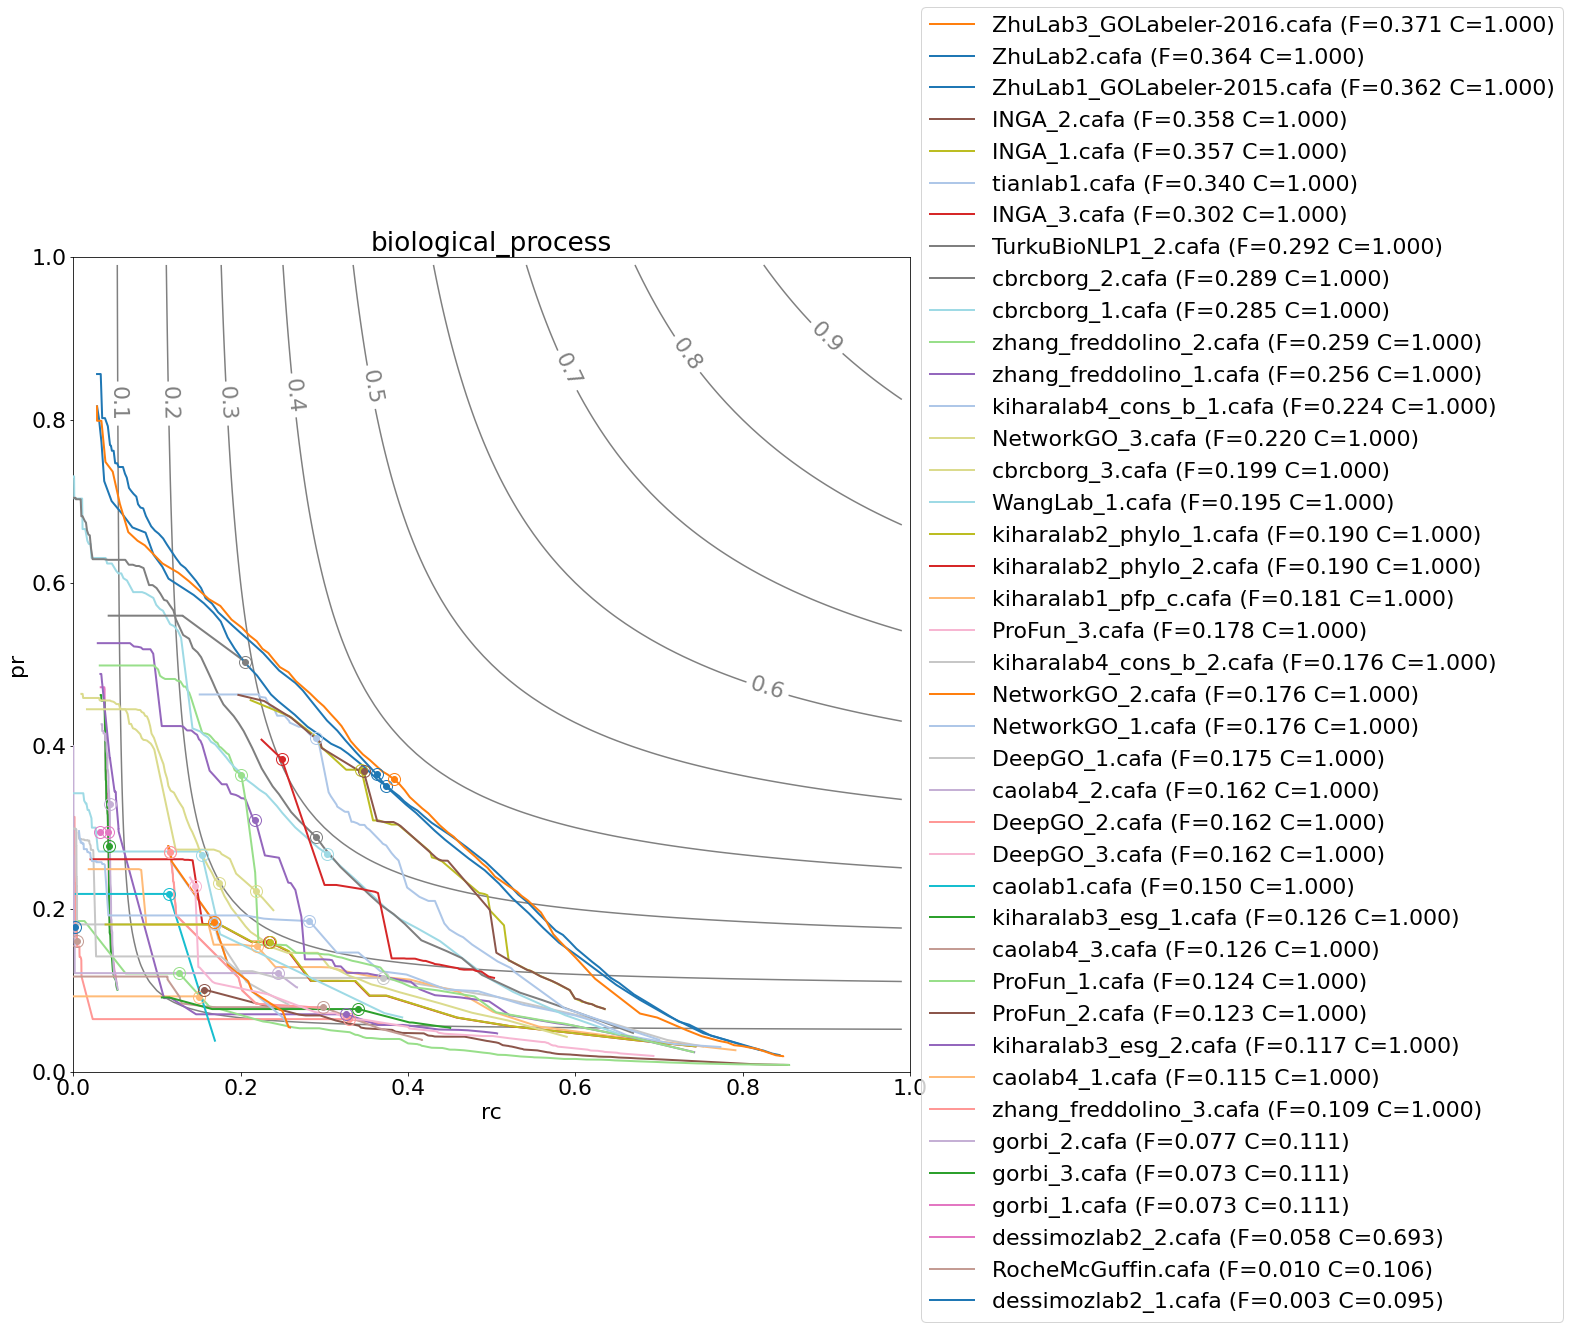

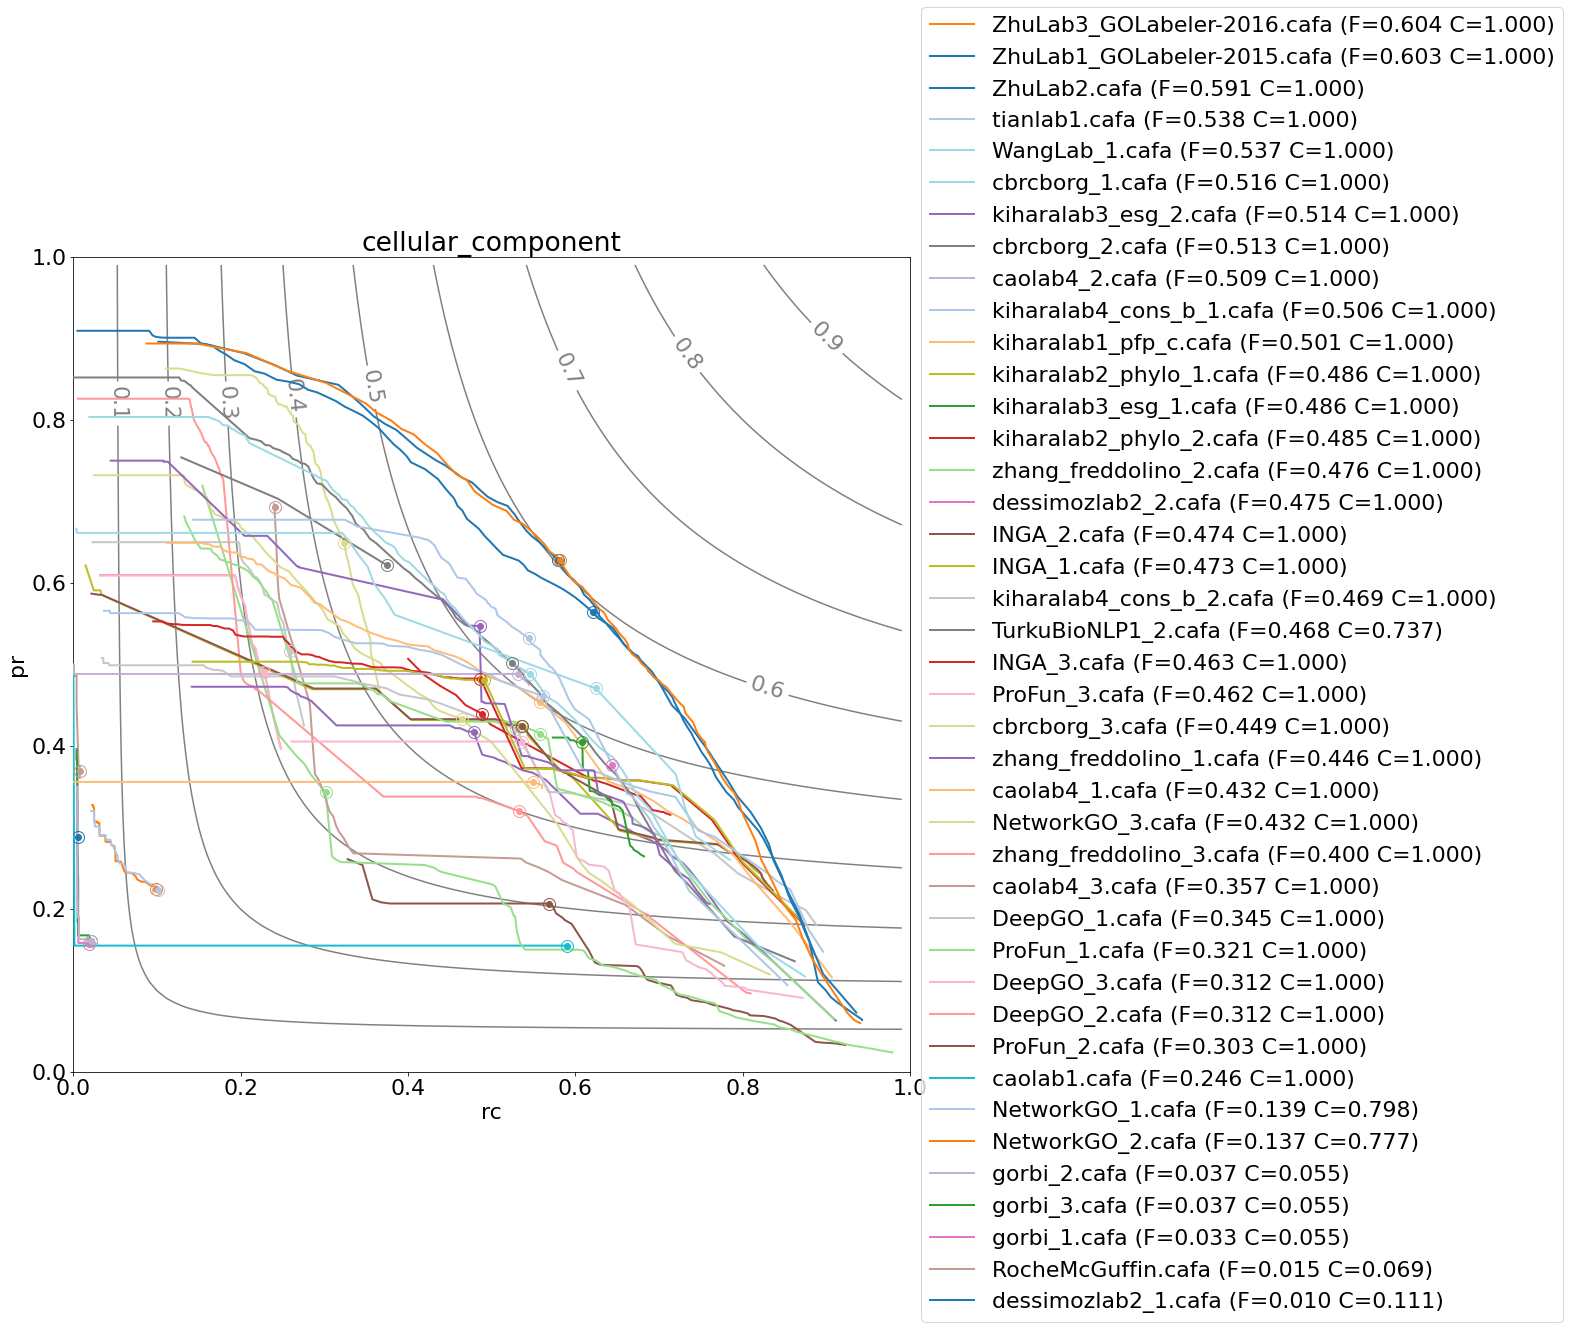

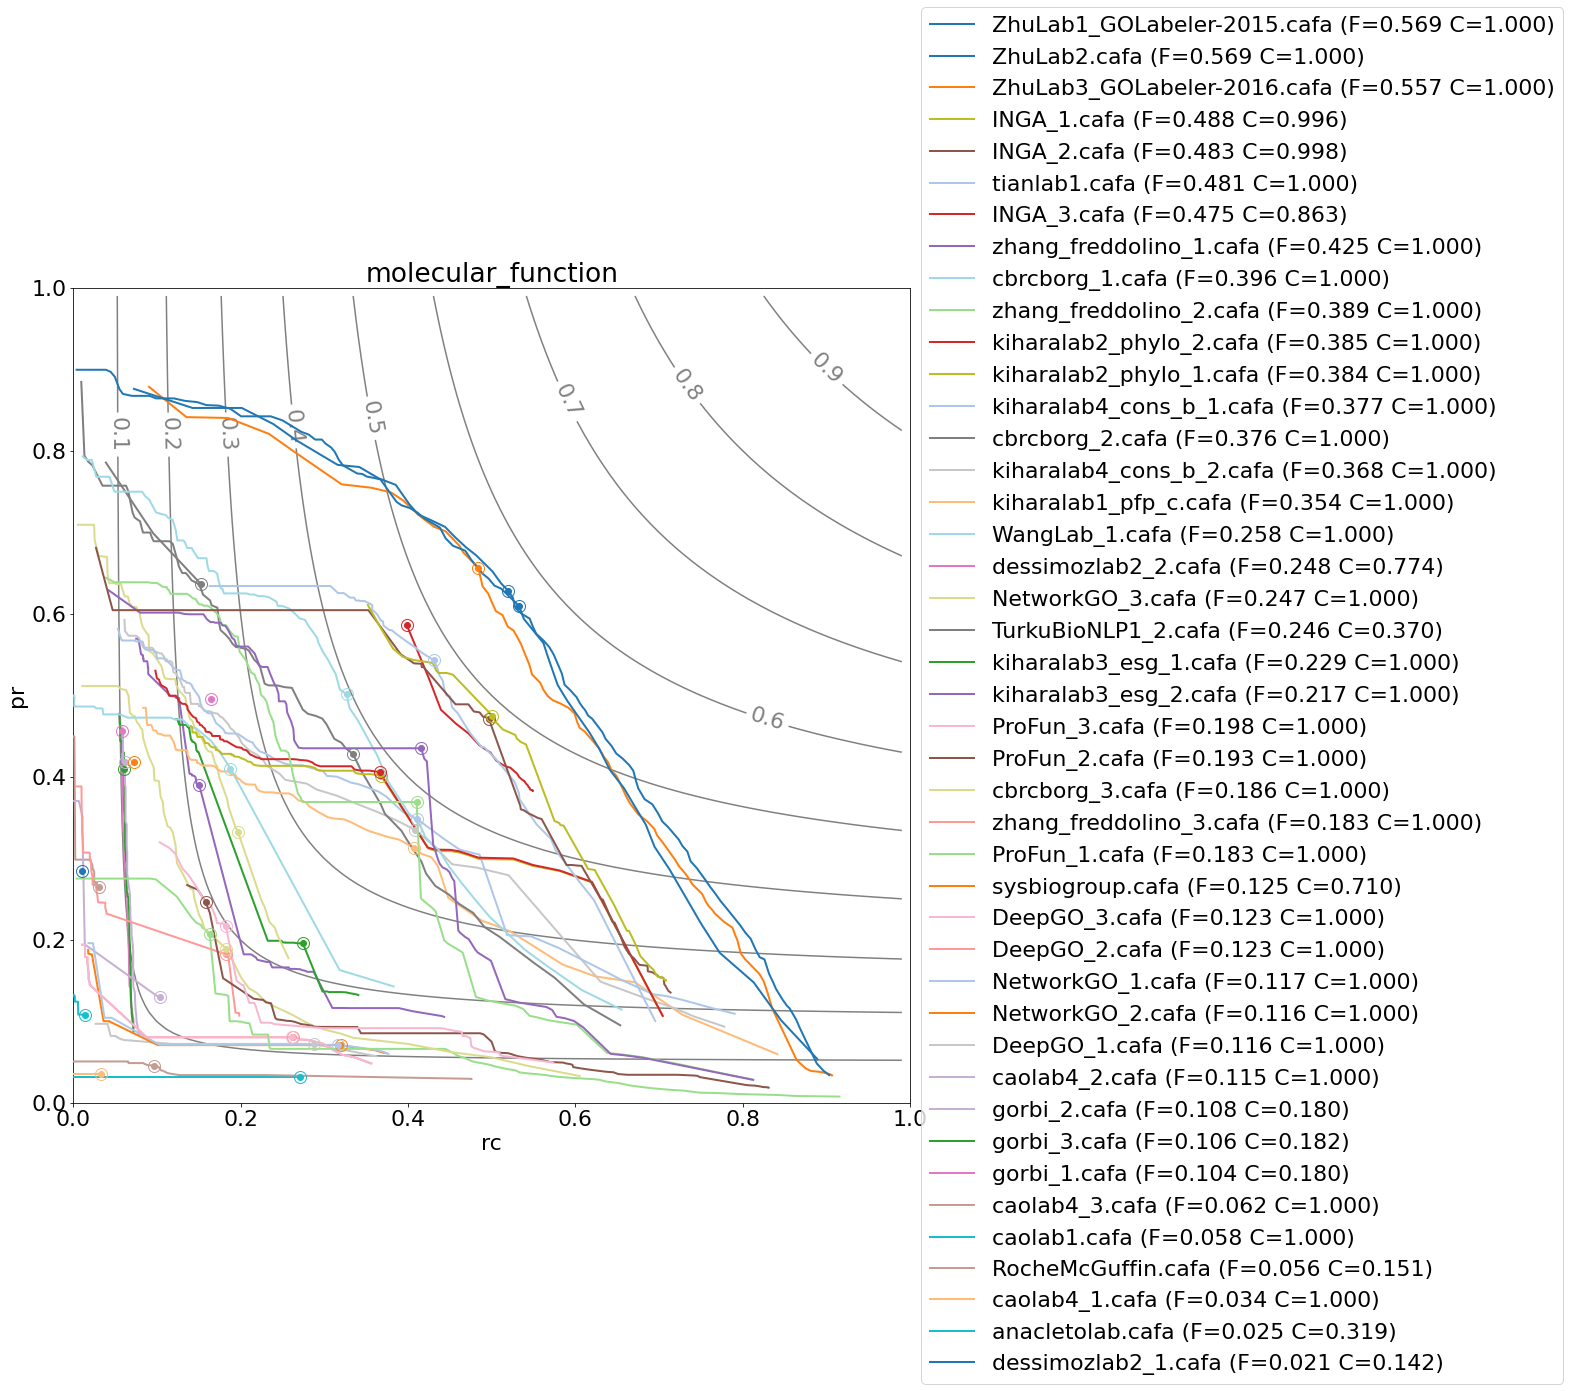

In [85]:
plt.rcParams.update({'font.size': 22})

# F-score contour lines
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 2 * X * Y / (X + Y)

for ns, df_g in df_best.groupby(level='ns'):
    fig, ax = plt.subplots(figsize=(15, 15))

     # Contour lines
    if metric in ['f', 'wf']:
        CS = ax.contour(X, Y, Z, np.arange(0.1, 1.0, 0.1), colors='gray')
        ax.clabel(CS, inline=True)#, fontsize=10)

    for i, (index, row) in enumerate(df_g.sort_values(by=[metric, 'max_cov'], ascending=[False if metric in ['f', 'wf'] else True, False]).iterrows()):
        # print(row)
        data = df_methods.loc[index[:-1]]
        ax.plot(data[cols[0]], data[cols[1]], color=row['colors'], label=row['label'], lw=2, zorder=500-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=12, mfc='none', zorder=1000-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=6, zorder=1000-i)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlim(0, max(1, df_best.loc[:,:,ns,:][cols[0]].max()))
    plt.ylim(0, max(1, df_best.loc[:,:,ns,:][cols[1]].max()))

    ax.set_title(ns)
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])



    plt.savefig("{}/fig_{}_{}.png".format(out_folder, metric, ns), bbox_inches='tight')
    # plt.clf()